# Práctica Color

### Importo Librerias

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import imageio
import math
import copy
import numpy.linalg as linalg
from scipy.signal import convolve2d
from skimage import color

### Importo imagenes

In [43]:
imgNaranjo = imageio.imread('img/color/naranjo.jpg')
imgCrayones = imageio.imread('img/color/crayones.tif')


def mostrarImagen(img, cmap=None):
    plt.imshow(img, cmap=cmap)
    plt.show()

def calcNivelesGrises(img):
    return np.iinfo(img.dtype).max+1

# Ejercicio 1

# Ejercicio 2

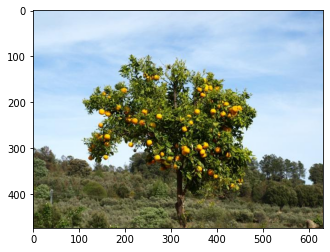

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


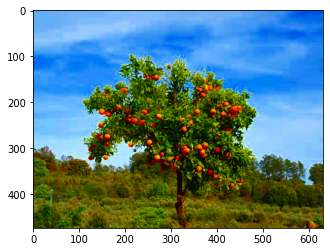

In [35]:
c = 3
imgNaranjoHSV = color.rgb2hsv(imgNaranjo)
imgNaranjoHSV[:,:,1] *= c
imgNaranjoSaturated = color.hsv2rgb(imgNaranjoHSV)

mostrarImagen(imgNaranjo)
mostrarImagen(imgNaranjoSaturated)

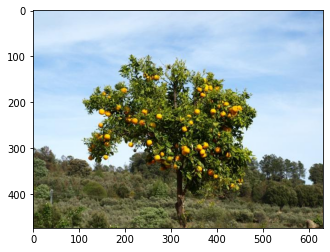

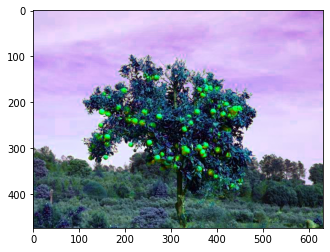

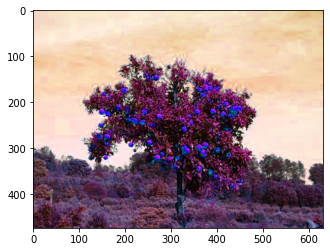

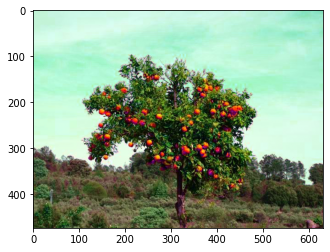

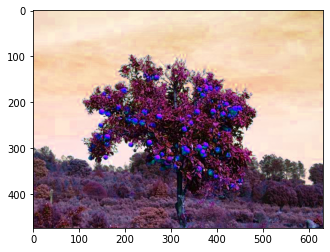

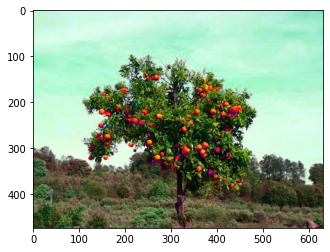

In [39]:
def sumarHue(img, c):
    img = color.rgb2hsv(img)
    img[:,:,0] += c
    img = color.hsv2rgb(img)
    return img

mostrarImagen(imgNaranjo)
mostrarImagen(sumarHue(imgNaranjoSaturated,10))
mostrarImagen(sumarHue(imgNaranjoSaturated,50))
mostrarImagen(sumarHue(imgNaranjoSaturated,100))
mostrarImagen(sumarHue(imgNaranjoSaturated,200))
mostrarImagen(sumarHue(imgNaranjoSaturated,250))

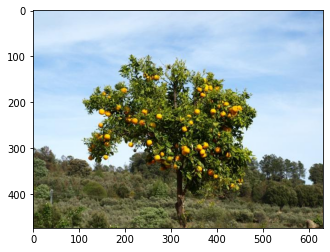

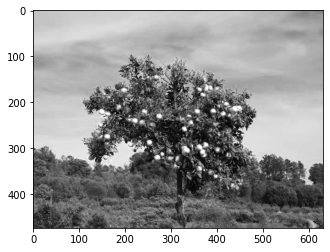

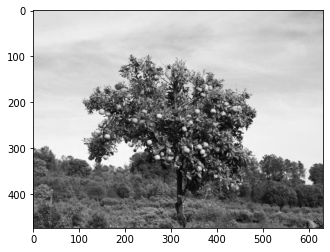

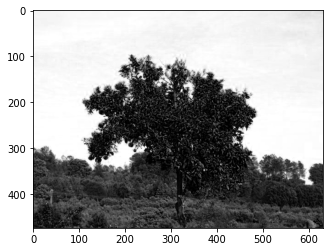

In [47]:
mostrarImagen(imgNaranjo)
mostrarImagen(imgNaranjo[:,:,0], cmap='gray')
mostrarImagen(imgNaranjo[:,:,1], cmap='gray')
mostrarImagen(imgNaranjo[:,:,2], cmap='gray')

# Ejercicio 3

In [48]:
def distMahalanobis(z, a):
    return math.sqrt(np.dot(np.dot((z-a).T, 1/np.cov(a)),(z-a)))

In [ ]:
color_piel = np.array([1,1,1])
% calculo de la media de un color
% lectura de la imagen
img = imread('planeta.tif');
img = imresize(img,0.6);

[M,N,pipo] = size(img);

% extraccion de un parche para identificar la region de color rojo en la
% imagen
r = roipoly(img);

% imagen del rojo en los 3 canales
rojo = img(:,:,1) .* uint8(r);
verde = img(:,:,2) .* uint8(r);
azul = img(:,:,3) .* uint8(r);

g = cat(3,rojo,verde,azul);

figure(1)
subplot(1,2,1)
imshow(img)
subplot(1,2,2)
imshow(g)

% recuperar los indices de la mascara
idx = find(r);

% armar una matriz de 3 columnas como puntos
vrojo = single(rojo(idx));
vverde = single(verde(idx));
vazul = single(azul(idx));

mcolor = [vrojo vverde vazul];

plot3(vrojo/255,vverde/255,vazul/255,'.');
xlabel('Red');
ylabel('Green');
zlabel('Blue');
grid on
axis equal
xlim([0 2]);
ylim([0 2]);
zlim([0 2]);

% calcular la media de los colores
medrojo = mean(mcolor)
% calcular la covarianza
covrojo = cov(mcolor);
icovrojo = inv(covrojo);
% ahora se calcula para toda la imagen la distancia a estos valores
% calculados utilizando la formula de la distancia de Mahalanobis
disp('Usando Mahalanobis para calcular las distancias');
Dst = zeros(M,N);
for y=1:M
    for x=1:N
        z = single(squeeze(img(y,x,:)))';
        Dst(y,x) = (z - medrojo) * icovrojo * (z - medrojo)';
    end
end
figure(2)
Rojizo = uint8(Dst < 5);
figure(2)
subplot(1,2,1)
imshow(img)
subplot(1,2,2)
imshow(255*Rojizo)

# Ejercicio 4

# Ejercicio 5